# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [250]:
print("Сиды в домашках фиксируются для того, чтобы результаты проделанной работы были воспроизводимы и проверяемы на других устройствах и другими людьми. Установка сида позволяет воспроизводить определенную последовательность случайных чисел")

Сиды в домашках фиксируются для того, чтобы результаты проделанной работы были воспроизводимы и проверяемы на других устройствах и другими людьми. Установка сида позволяет воспроизводить определенную последовательность случайных чисел


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [251]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [252]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [253]:
pd.concat([df_train.head(5),df_train.tail(5)])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
6998,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [254]:
df_train.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [255]:
df_train.describe(include=['O'])

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [256]:
df_test.describe()

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [257]:
df_test.describe(include=['O'])

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [258]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [259]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

In [260]:
print('В датасетах есть пропуски. Это пропуски в первую очередь в плохо обработанных колонках, в которых остались единицы измерения и максимальные/минимальные значения: mileage, engine, max_power, torque. Также пропуски есть в колонке seats')

В датасетах есть пропуски. Это пропуски в первую очередь в плохо обработанных колонках, в которых остались единицы измерения и максимальные/минимальные значения: mileage, engine, max_power, torque. Также пропуски есть в колонке seats


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [261]:
df_train.loc[:, df_train.columns !='selling_price'].duplicated().sum()

1159

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [262]:
df_train[df_train.loc[:, df_train.columns !='selling_price'].duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [263]:
indexes_all = set(df_train.index)
indexes = set(df_train[df_train.loc[:, df_train.columns !='selling_price'].duplicated()].index)
df_train = df_train.iloc[list(indexes_all - indexes),]

In [264]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [265]:
df_train = df_train.reset_index()

In [266]:
df_train = df_train.drop('index', axis = 1)

In [267]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [268]:
columns = ['mileage', 'engine', 'max_power']
for col in columns:
    df_train[col] = pd.to_numeric(df_train[col].str.extract('(\d+(\.\d+)?)', expand=False)[0], errors='coerce')
for col in columns:
    df_test[col] = pd.to_numeric(df_test[col].str.extract('(\d+(\.\d+)?)', expand=False)[0], errors='coerce')

In [269]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75nm@ 4000rpm,5.0


In [270]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498.0,112.0,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5,1497.0,108.5,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9,1799.0,130.0,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1,1498.0,98.6,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5,1172.0,65.0,96 Nm at 3000 rpm,5.0


Бонусное перекодирование torque

In [271]:
df_train['max_torque_rpm'] = pd.to_numeric(df_train['torque'].str.extract(r'([\d,.]+)(?=\D*$|$)')[0].str.replace(',', ''), errors='coerce')
c = df_train['torque'].str.extract(r'(^[\d.]+)').astype('float')
b = df_train['torque'].str.contains('Nm', case=False)
#torque в Ньютонах метрах!!!
df_train['torque'] = c[0] * b.map({True: 1, False: 9.80665})

In [272]:
df_test['max_torque_rpm'] = pd.to_numeric(df_test['torque'].str.extract(r'([\d,.]+)(?=\D*$|$)')[0].str.replace(',', ''), errors='coerce')
c = df_test['torque'].str.extract(r'(^[\d.]+)').astype('float')
b = df_test['torque'].str.contains('Nm', case=False)
#torque в Ньютонах метрах!!!
df_test['torque'] = c[0] * b.map({True: 1, False: 9.80665})

In [273]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.000000,5.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.000000,5.0,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.668960,5.0,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,112.776475,5.0,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.750000,5.0,4000.0


In [274]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498.0,112.0,260.0,7.0,2200.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5,1497.0,108.5,260.0,5.0,2750.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9,1799.0,130.0,172.0,5.0,4300.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1,1498.0,98.6,200.0,5.0,1750.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5,1172.0,65.0,96.0,5.0,3000.0


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [275]:
columns = ['mileage', 'engine', 'max_power', 'max_torque_rpm', 'torque', 'seats']
for col in columns:
    df_train[col].fillna(df_train[col].median(), inplace=True)
    df_test[col].fillna(df_train[col].median(), inplace=True)


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [276]:
df_train['engine'] = df_train['engine'].astype('int')
df_train['seats'] = df_train['seats'].astype('int')
df_test['engine'] = df_test['engine'].astype('int')
df_test['seats'] = df_test['seats'].astype('int')

In [277]:
df_train['seats'].unique()

array([ 5,  4,  7,  8,  6,  9, 10, 14,  2])

In [278]:
print("Так как количество мест в машине имеет определенное максимальное значение, которое позволяет вместить конструкция, то признак нельзя назвать в полном смысле непрерывным. В данном случае, кол-во мест упирается в 8. Также нельзя четко упорядочить машины по количеству мест в них (это разные типы машин: легковая и микроавтобус), они конечно будут больше из-за этого, но скорее всего цена не зависит от того много ли мест в машине или нет")

Так как количество мест в машине имеет определенное максимальное значение, которое позволяет вместить конструкция, то признак нельзя назвать в полном смысле непрерывным. В данном случае, кол-во мест упирается в 8. Также нельзя четко упорядочить машины по количеству мест в них (это разные типы машин: легковая и микроавтобус), они конечно будут больше из-за этого, но скорее всего цена не зависит от того много ли мест в машине или нет


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

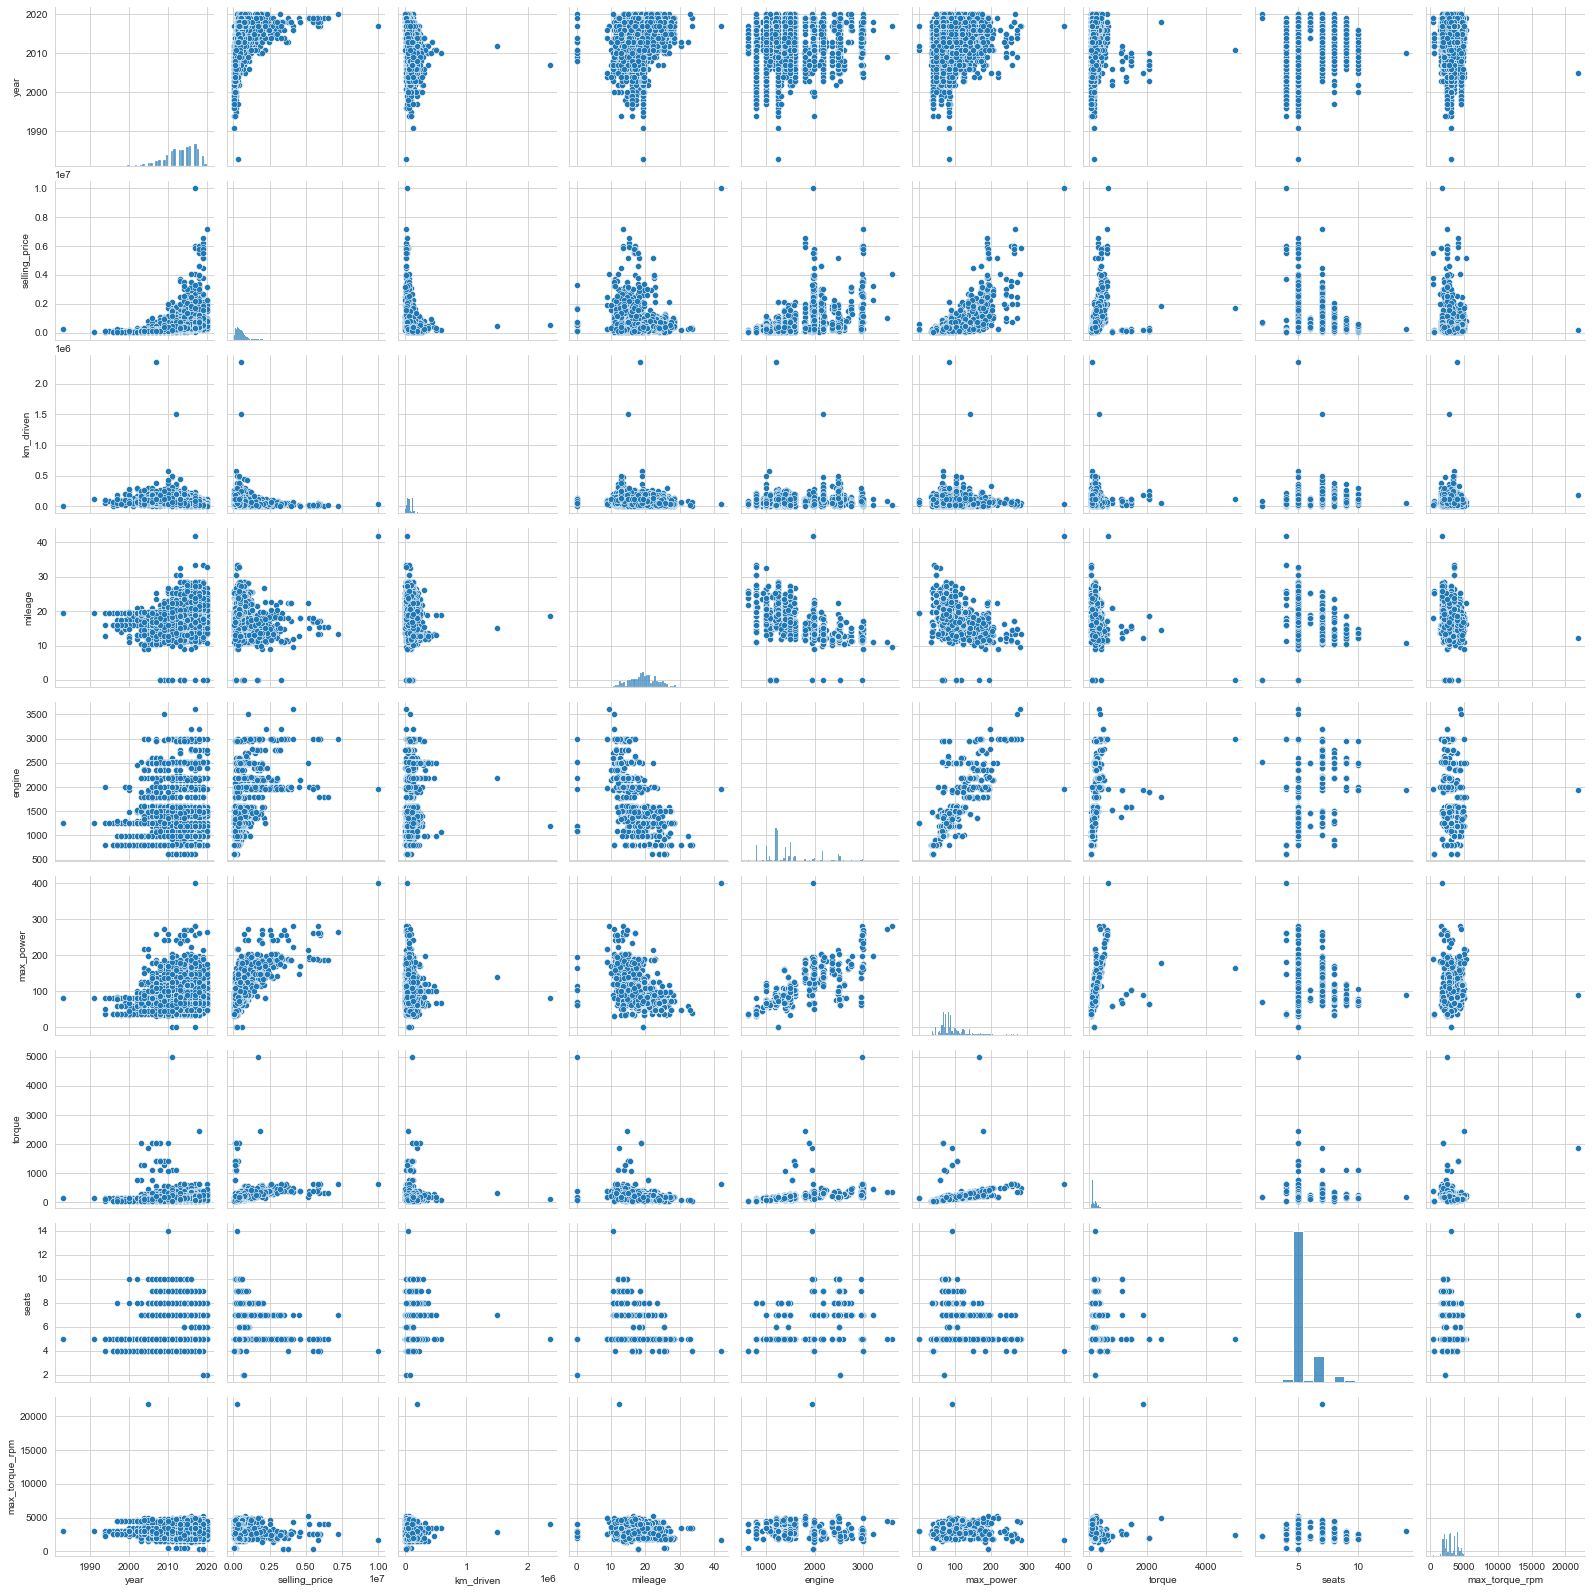

In [279]:
sns.pairplot(df_train);

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

In [280]:
print('Если рассматривать график pairplot, то можно сказать, что связь с целевой переменной наблюдается у year, km_driven, engine, max_power. Можно заметить, что для этих переменных существует некоторый паттерн разброса. Для этих переменных характерно (кроме km_driven), что чем выше значение, тем больше цена. Для km_driven наоборот. Эти наблюдения в принципе соотносятся со здравым смыслом понимания формирования цены на автомобиль. Для остальных признаков сложно сказать что-то о связи.')

Если рассматривать график pairplot, то можно сказать, что связь с целевой переменной наблюдается у year, km_driven, engine, max_power. Можно заметить, что для этих переменных существует некоторый паттерн разброса. Для этих переменных характерно (кроме km_driven), что чем выше значение, тем больше цена. Для km_driven наоборот. Эти наблюдения в принципе соотносятся со здравым смыслом понимания формирования цены на автомобиль. Для остальных признаков сложно сказать что-то о связи.


(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

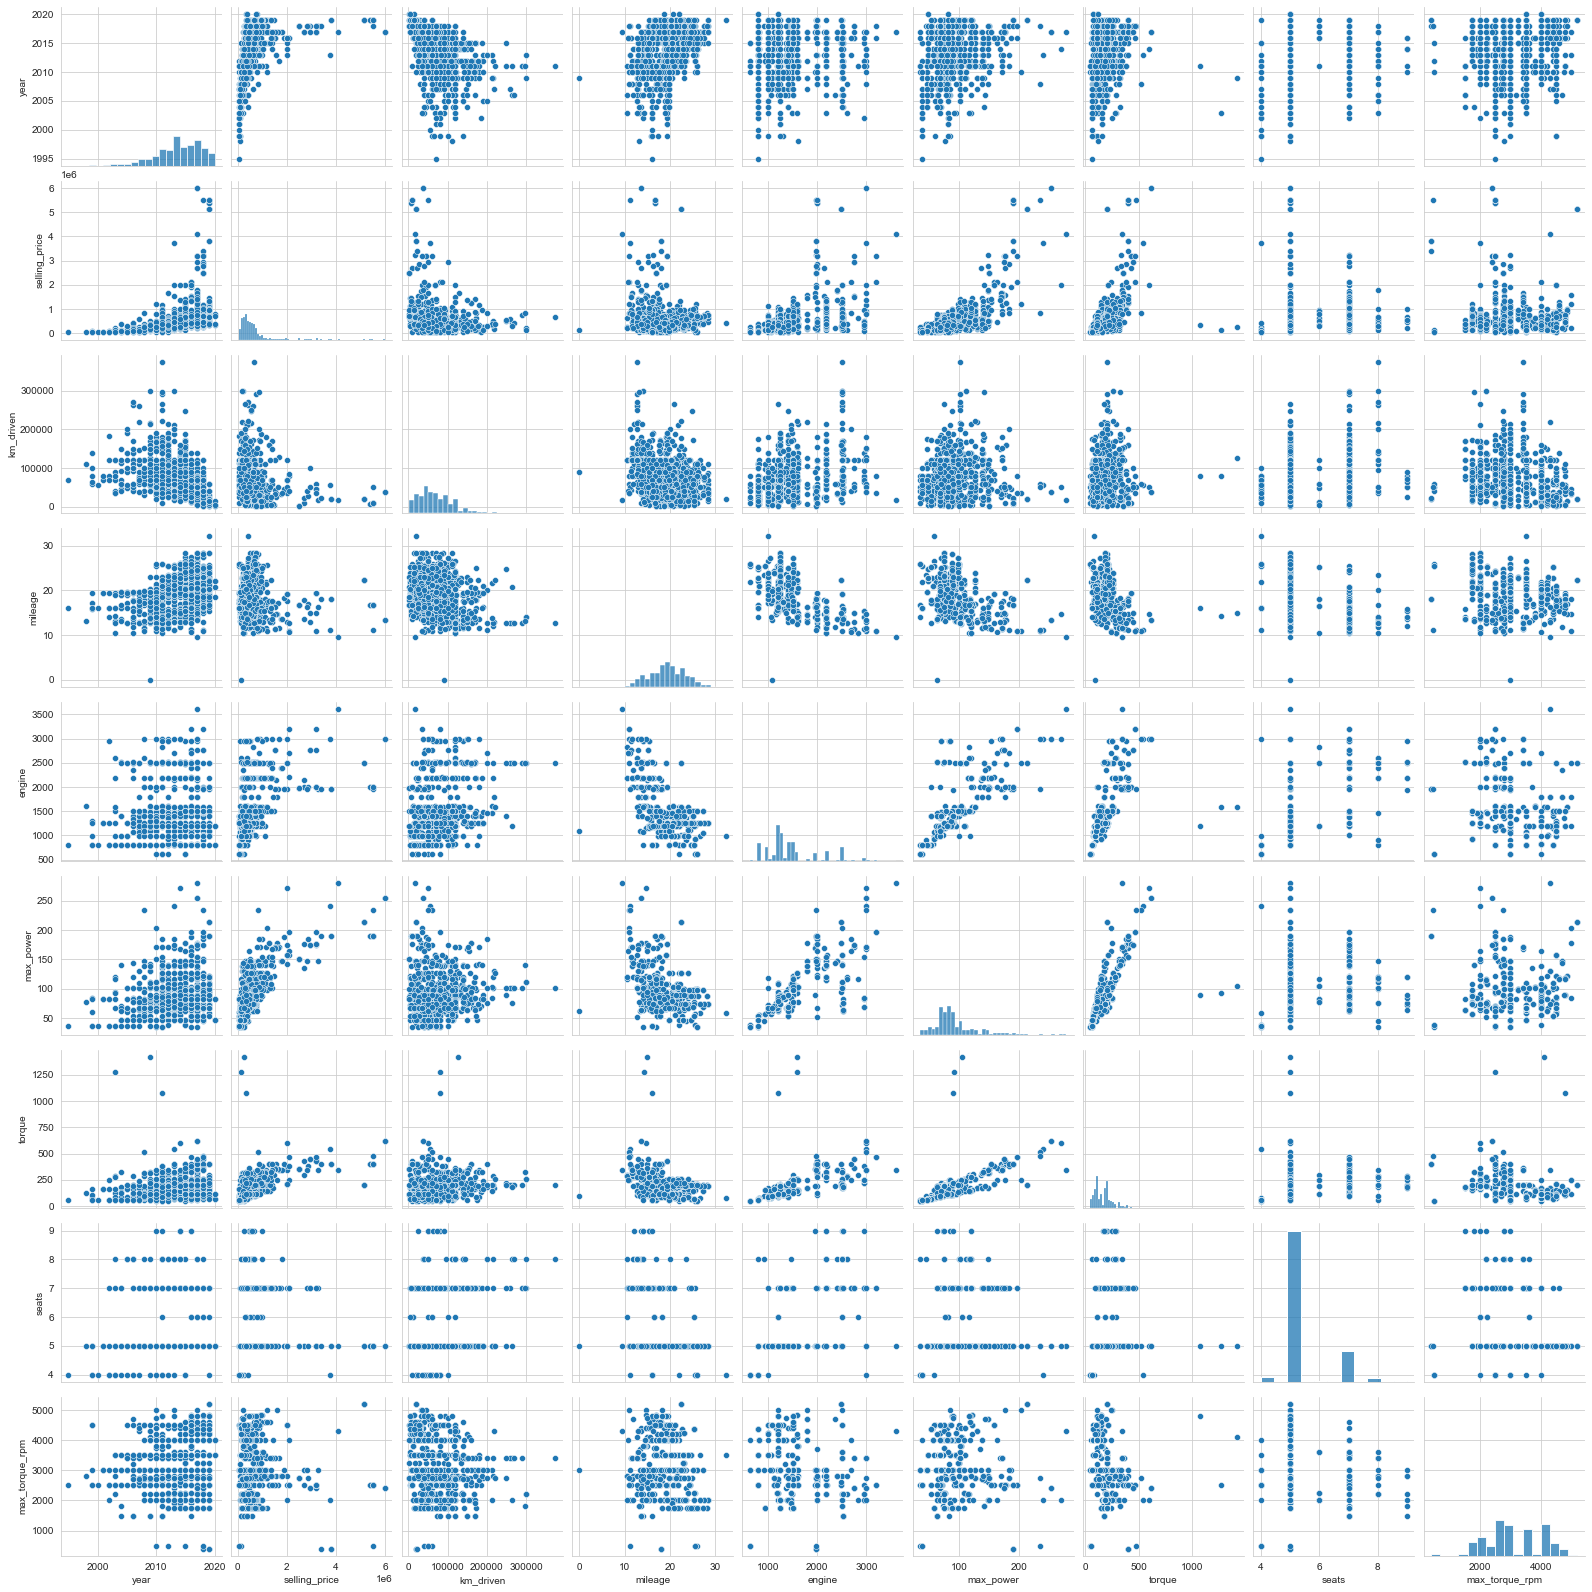

In [281]:
sns.pairplot(df_test);

In [282]:
print('Да, можно сказать, что трейн и тест показывают схожие зависимости переменных, однако так как в трейне больше наблюдений, то и вероятность попадания выбросов больше. Например по переменной km_driven можно заменить, что в трейне присутствуют выбросы, которые не дают рассмотреть связь детальнее.')

Да, можно сказать, что трейн и тест показывают схожие зависимости переменных, однако так как в трейне больше наблюдений, то и вероятность попадания выбросов больше. Например по переменной km_driven можно заменить, что в трейне присутствуют выбросы, которые не дают рассмотреть связь детальнее.


(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

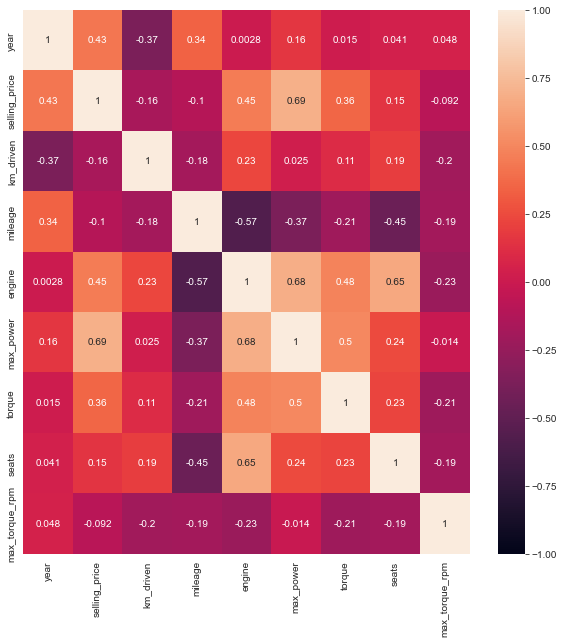

In [283]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True)

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

In [284]:
print('Из тепловой карты корреляции видно, что наименее скоррелированные признаки: year и engine (0.0028). Коррелируют с целевой переменной больше всего: year, max_power, engine. Сильная положительная линейная связь наблюдяется между переменными engine и max_power (0.68), engine и seats (0.68). Это достаточно логично, однако возникает риск мультиколлинеарности. С точки зрения данных правильно утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи (корреляция = -0.37)')

Из тепловой карты корреляции видно, что наименее скоррелированные признаки: year и engine (0.0028). Коррелируют с целевой переменной больше всего: year, max_power, engine. Сильная положительная линейная связь наблюдяется между переменными engine и max_power (0.68), engine и seats (0.68). Это достаточно логично, однако возникает риск мультиколлинеарности. С точки зрения данных правильно утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи (корреляция = -0.37)


(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

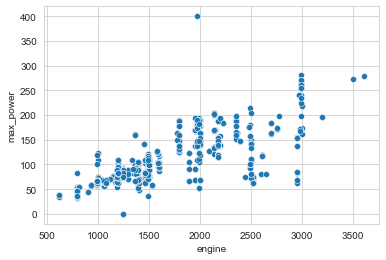

In [285]:
#целевую не берем!
sns.scatterplot(x= 'engine', y= 'max_power', data=df_train);

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

В качестве дополнительной визуализации, на мой взгляд, имеет смысл посмотреть на box plots. В первую очередь это позволит нам посмотреть действительно ли в наших данные есть выбросы или их нет. Также полезно посмотреть насколько вариативны признаки.

In [286]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   int32  
 10  max_power       5840 non-null   float64
 11  torque          5840 non-null   float64
 12  seats           5840 non-null   int32  
 13  max_torque_rpm  5840 non-null   float64
dtypes: float64(4), int32(2), int64(3), object(5)
memory usage: 593.2+ KB


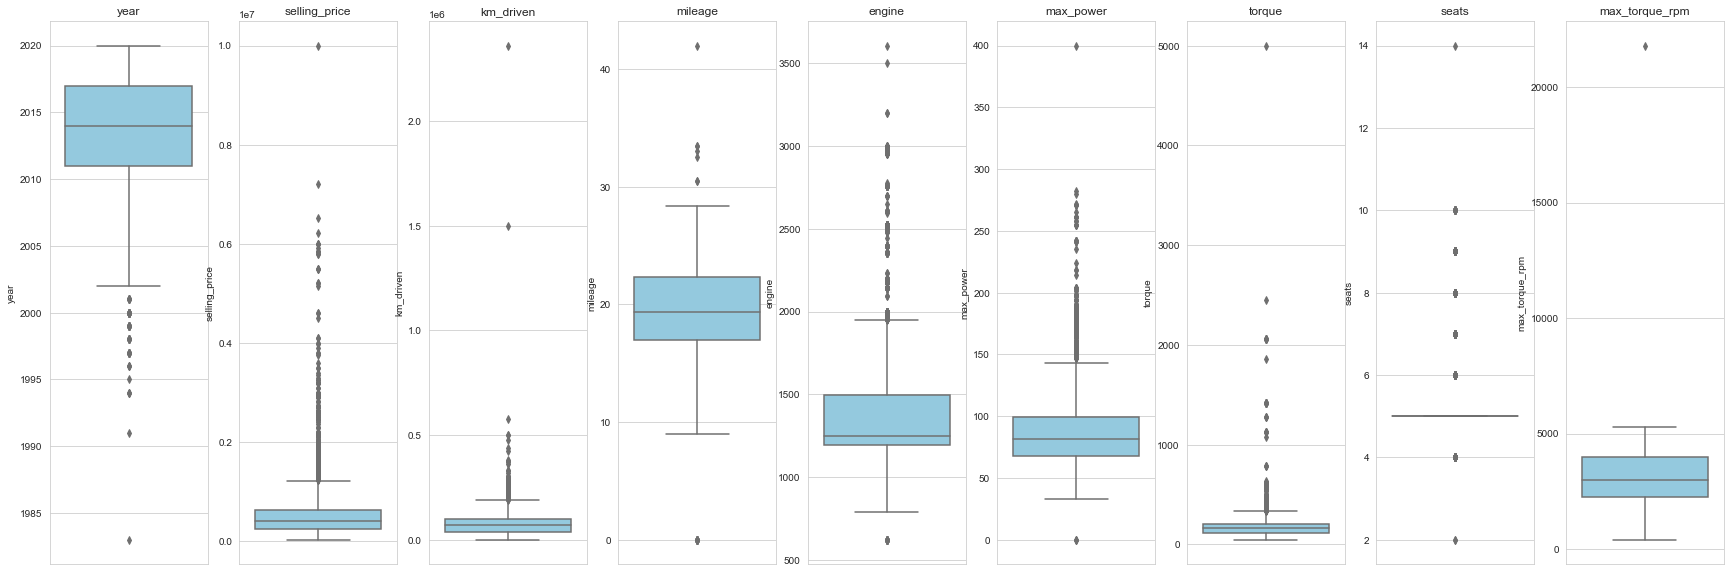

In [287]:
fig, axes = plt.subplots(nrows=1, ncols=9, figsize=(30, 10))
col_n = ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']

for i, column in enumerate(col_n):
    ax = sns.boxplot(y=df_train[column], ax=axes[i], color='skyblue')
    ax.set_title(column)
    ax.tick_params(axis = 'y', labelsize=10)

По боксплатам видно, что самое большое количество выбросов наблюдается у нашей целевой переменной, также выбросы есть у engine, max_power и torque. Это не удивительно,так как на автомобильном рынке встречаются машины редкие "монстры"-машины, у которых огромные показатели по мощности, однако на мой взгляд такие выбросы ухудшают предсказательную силу модели для обычных среднестатистических автомобилей. 

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [288]:
y_train = df_train['selling_price']
X_train = df_train[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque', 'max_torque_rpm']]

In [289]:
assert X_train.shape == (5840, 8)

In [290]:
y_test = df_test['selling_price']
X_test = df_test[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque', 'max_torque_rpm']]

In [291]:
assert X_test.shape == (1000, 8)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [292]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [293]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [294]:
model1= LinearRegression()
model1.fit(X_train_scaled, y_train)
y_train_pred = model1.predict(X_train_scaled)
y_test_pred = model1.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)


r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

print(f'R^2(трейн): {r2_train:.2f}\nMSE(трейн): {mse_train:.2f}\nR^2(тест): {r2_test:.2f}\nMSE(тест): {mse_test:.2f}')

R^2(трейн): 0.60
MSE(трейн): 113837878287.48
R^2(тест): 0.58
MSE(тест): 241836111915.74


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [295]:
coefficients = pd.DataFrame({'Признак': X_train.columns, 'Коэффициент': model1.coef_})
print(coefficients)

          Признак    Коэффициент
0            year  166685.669623
1       km_driven  -49166.405375
2         mileage  -11166.781873
3          engine   18624.880913
4       max_power  330236.324763
5           seats  -29658.932294
6          torque   10380.008289
7  max_torque_rpm  -63604.472215


In [296]:
print('Так как признаки стандартизированы мы можем сравнить силу связи предикторов. Берем коэффициенты по модулю. Наиболее сильно связанным предиктором с ценой автомобиля является - max_power, то есть лошадиные силы. С увеличением лошадиной силы на 1 л.с. цена автомобиля увеличивается на 330236, при неизменности остальных предикторов')

Так как признаки стандартизированы мы можем сравнить силу связи предикторов. Берем коэффициенты по модулю. Наиболее сильно связанным предиктором с ценой автомобиля является - max_power, то есть лошадиные силы. С увеличением лошадиной силы на 1 л.с. цена автомобиля увеличивается на 330236, при неизменности остальных предикторов


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [297]:
from sklearn.linear_model import Lasso
model2 = Lasso()
model2.fit(X_train, y_train)
y_train_pred = model2.predict(X_train_scaled)
y_test_pred = model2.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)


r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

print(f'Lasso-регрессия\nR^2(трейн): {r2_train:.2f}\nMSE(трейн): {mse_train:.2f}\nR^2(тест): {r2_test:.2f}\nMSE(тест): {mse_test:.2f}')

Lasso-регрессия
R^2(трейн): -23713.96
MSE(трейн): 6797616404885907.00
R^2(тест): -11852.20
MSE(тест): 6813556267082727.00


D:\AnacondaPython\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
D:\AnacondaPython\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [298]:
coefficients_lasso = pd.DataFrame({'Признак': X_train.columns, 'Коэффициент': model2.coef_})
print(coefficients_lasso)

          Признак   Коэффициент
0            year  40701.724802
1       km_driven     -0.818544
2         mileage  -2801.416689
3          engine     38.350111
4       max_power  10438.089459
5           seats -30192.141661
6          torque     72.364515
7  max_torque_rpm    -69.270453


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [299]:
print('Сразу видим, что у модели получился отрицательный R^2, что говорит о несостоятельности модели с дефолтными параметрами, нужно выбирать другие. Также можно заметить, что коэффициент у переменной km_driven почти 0, что говорит о том, что этот признак не важен для модели. Для переменных  engine, torque, max_torque_rpm коэффициент близок к 0. L1-регуляризация вводит штраф на сумму абсолютных значений коэффициентов, таким образом наиболее важные признаки сохраняются, а неважные зануляются')

Сразу видим, что у модели получился отрицательный R^2, что говорит о несостоятельности модели с дефолтными параметрами, нужно выбирать другие. Также можно заметить, что коэффициент у переменной km_driven почти 0, что говорит о том, что этот признак не важен для модели. Для переменных  engine, torque, max_torque_rpm коэффициент близок к 0. L1-регуляризация вводит штраф на сумму абсолютных значений коэффициентов, таким образом наиболее важные признаки сохраняются, а неважные зануляются


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [300]:
from sklearn.model_selection import GridSearchCV, KFold
param_grid = {'alpha': [0.01, 0.02, 0.05, 0.1, 0.5, 0.99, 5.0, 10.0]}
cv = KFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(model2, param_grid, cv=cv, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.02, 0.05, 0.1, 0.5, 0.99, 5.0,
                                   10.0]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [301]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

print(f'Lasso-регрессия (alpha = 10.0)\nR^2(трейн): {r2_train:.2f}\nMSE(трейн): {mse_train:.2f}\nR^2(тест): {r2_test:.2f}\nMSE(тест): {mse_test:.2f}')

Lasso-регрессия (alpha = 10.0)
R^2(трейн): 0.60
MSE(трейн): 113837879649.65
R^2(тест): 0.58
MSE(тест): 241845450658.77


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

In [302]:
len(grid_search.cv_results_)

31

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [303]:
print(f"Лучший коэффициент регуляризации: {grid_search.best_params_['alpha']}")

Лучший коэффициент регуляризации: 10.0


In [304]:
coefficients_lasso_gs = pd.DataFrame({'Признак': X_train.columns, 'Коэффициент': best_model.coef_})
print(coefficients_lasso_gs)

          Признак    Коэффициент
0            year  166663.635343
1       km_driven  -49157.097301
2         mileage  -11134.062190
3          engine   18604.711646
4       max_power  330248.533154
5           seats  -29619.750082
6          torque   10375.396013
7  max_torque_rpm  -63583.299339


In [305]:
print('Лучший коэффициент регуляризации - 10. Никакие коэффициенты не занулились')

Лучший коэффициент регуляризации - 10. Никакие коэффициенты не занулились


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [306]:
from sklearn.linear_model import ElasticNet
model3 = ElasticNet()
param_grid = {'alpha': [0.01, 0.02, 0.05, 0.1, 0.5, 0.99, 5.0, 10.0, 20.0, 100.0],
              'l1_ratio': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1]}
cv = KFold(n_splits=10, shuffle=True, random_state=42)
grid_search_Elastic = GridSearchCV(model3, param_grid, cv=cv, scoring='neg_mean_squared_error', return_train_score=True)
grid_search_Elastic.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.02, 0.05, 0.1, 0.5, 0.99, 5.0, 10.0,
                                   20.0, 100.0],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      1]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [307]:
best_params = grid_search_Elastic.best_params_
best_model = grid_search_Elastic.best_estimator_

y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

print(f'ElasticNet\nR^2(трейн): {r2_train:.2f}\nMSE(трейн): {mse_train:.2f}\nR^2(тест): {r2_test:.2f}\nMSE(тест): {mse_test:.2f}')

ElasticNet
R^2(трейн): 0.60
MSE(трейн): 113853709161.87
R^2(тест): 0.58
MSE(тест): 242885634289.06


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [308]:
print(f"Лучший коэффициент регуляризации: {grid_search_Elastic.best_params_['alpha']}\nЛучший параметр для штрафа: {grid_search_Elastic.best_params_['l1_ratio']}")

Лучший коэффициент регуляризации: 0.02
Лучший параметр для штрафа: 0.6


In [309]:
coefficients_Elastic = pd.DataFrame({'Признак': X_train.columns, 'Коэффициент': best_model.coef_})
print(coefficients_Elastic)

          Признак    Коэффициент
0            year  165548.396601
1       km_driven  -49529.955982
2         mileage   -9806.892989
3          engine   23382.592903
4       max_power  324614.747041
5           seats  -30346.498297
6          torque   11721.947290
7  max_torque_rpm  -61687.601368


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [310]:
X_train_cat = df_train.drop(['selling_price', 'name'], axis = 1)
X_test_cat = df_test.drop(['selling_price', 'name'], axis = 1)

In [311]:
assert X_train_cat.shape == (5840, 12)

In [312]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [313]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
X_train_dummies = pd.get_dummies(X_train_cat, columns=['fuel', 'seller_type', 'transmission', 'owner', 'seats'], drop_first=True)
X_test_dummies = pd.get_dummies(X_test_cat, columns=['fuel', 'seller_type', 'transmission', 'owner', 'seats'], drop_first=True)
X_test_dummies = X_test_dummies.assign(seats_10=0, seats_14=0, seats_4=0)

In [314]:
X_test_dummies

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,...,owner_Test Drive Car,owner_Third Owner,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14,seats_4
0,2010,168000,14.00,2498,112.00,260.00000,2200.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2017,25000,21.50,1497,108.50,260.00000,2750.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2007,218463,12.90,1799,130.00,172.00000,4300.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,2015,173000,25.10,1498,98.60,200.00000,1750.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2011,70000,16.50,1172,65.00,96.00000,3000.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2008,100000,19.81,1086,68.05,99.04000,4500.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
996,2017,50000,18.60,1197,81.83,114.70000,4000.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
997,2009,40000,23.00,1396,90.00,219.66896,2750.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
998,2012,25000,20.36,1197,78.90,111.80000,4000.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [315]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

model4 = Ridge()
param_grid = {'alpha': [0.01, 0.02, 0.05, 0.1, 0.5, 0.99, 5.0, 10.0, 20.0, 100.0]}
cv = KFold(n_splits=10, shuffle=True, random_state=42)
grid_search_Ridge = GridSearchCV(model4, param_grid, cv=cv, scoring='r2', return_train_score=True)
grid_search_Ridge.fit(X_train_dummies, y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.02, 0.05, 0.1, 0.5, 0.99, 5.0, 10.0,
                                   20.0, 100.0]},
             return_train_score=True, scoring='r2')

In [316]:
best_params = grid_search_Ridge.best_params_
best_model = grid_search_Ridge.best_estimator_

y_train_pred = best_model.predict(X_train_dummies)
y_test_pred = best_model.predict(X_test_dummies)

r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

print(f'Ridge\nR^2(трейн): {r2_train:.2f}\nMSE(трейн): {mse_train:.2f}\nR^2(тест): {r2_test:.2f}\nMSE(тест): {mse_test:.2f}')

Ridge
R^2(трейн): 0.67
MSE(трейн): 93542986939.98
R^2(тест): 0.35
MSE(тест): 372329347491.72


D:\AnacondaPython\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [317]:
print('Видно, что качество модели не улучшилось, а наоборот уменьшилось, особенно на тесте :(')

Видно, что качество модели не улучшилось, а наоборот уменьшилось, особенно на тесте :(


# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

Попробуем посчитать новый признак число лошадей на 1 объема двигателя автомобиля

In [318]:
df_train['bph/CC'] = df_train['max_power'] / df_train['engine']
df_test['bph/CC'] = df_test['max_power'] / df_test['engine']

Также добавим квадрат года,так как скорее всего связь года с целевой переменной квадратичная 

In [319]:
df_train['year2'] = df_train['year'] ** 2
df_test['year2'] = df_test['year'] ** 2

Однако перед нами стоит более существенный вопрос: почему модель с дамми переменными получилась такая плохая? Мне кажется это из-за того, что в ней много бесполезных дамми переменных, например кол-во сидений явно можно сжать до нескольких категорий. Давайте так и попробуем, сделаем обработку для переменных seats и owner
Можно условно разделить машины по кол-ву мест на следующие категории: 
* 2-5 мест стандартный автомобиль
* 6-7 - семейный
* 8 и больше - минивен (https://en.wikipedia.org/wiki/Minivan)

А переменную владельцев изменим на:
* 1-2 владелец
* 3 и более + тестовые
Так как обычно на перекупленные 100 раз машины меньше, а 1-2 владельца еще держится

In [320]:
df_train['owner'].value_counts()

First Owner             3603
Second Owner            1639
Third Owner              454
Fourth & Above Owner     140
Test Drive Car             4
Name: owner, dtype: int64

In [321]:
bins = [2, 6, 8, 20]
df_train['seats'] = pd.cut(df_train['seats'], bins=bins, labels=['2-5', '6-7', '8+'], right=False)
df_test['seats'] = pd.cut(df_test['seats'], bins=bins, labels=['2-5', '6-7', '8+'], right=False)

In [322]:
df_train['owner'] = df_train['owner'].replace({'First Owner': '1-2', 'Second Owner': '1-2', 'Third Owner': '3+(test)', 'Fourth & Above Owner': '3+(test)', 'Test Drive Car': '3+(test)'})
df_test['owner'] = df_test['owner'].replace({'First Owner': '1-2', 'Second Owner': '1-2', 'Third Owner': '3+(test)', 'Fourth & Above Owner': '3+(test)', 'Test Drive Car': '3+(test)'})

 Как мною раньше было упомянуто, в данных есть выбросы, которые не очень хорошо влияют на состоятельность модели. По предыдущей визуализации было установлено, что большое число выбросов у колонок: selling_price, engine, max_power, torque. Попробуем просто убрать выбросы из датасета. Будем убирать выбросы, которые находятся за пределами 3 с.о. Это достаточно щадящее условие, что обезопасит нас от исключения половины выборки

In [323]:
mean_value = df_train['selling_price'].mean()
std_dev = df_train['selling_price'].std()

# Определение границ для определения выбросов (например, за пределами 2 стандартных отклонений)
lower_bound = mean_value - 3 * std_dev
upper_bound = mean_value + 3 * std_dev
df_clear = df_train[(df_train['selling_price'] >= lower_bound) & (df_train['selling_price'] <= upper_bound)]

In [324]:
df_clear.shape

(5748, 16)

In [325]:
mean_value = df_clear['engine'].mean()
std_dev = df_clear['engine'].std()
lower_bound = mean_value - 3 * std_dev
upper_bound = mean_value + 3 * std_dev
df_clear = df_clear[(df_clear['engine'] >= lower_bound) & (df_clear['engine'] <= upper_bound)]

In [326]:
df_clear.shape

(5695, 16)

In [327]:
mean_value = df_clear['max_power'].mean()
std_dev = df_clear['max_power'].std()
lower_bound = mean_value - 3 * std_dev
upper_bound = mean_value + 3 * std_dev
df_clear = df_clear[(df_clear['max_power'] >= lower_bound) & (df_clear['max_power'] <= upper_bound)]

In [328]:
df_clear.shape

(5596, 16)

In [329]:
mean_value = df_clear['torque'].mean()
std_dev = df_clear['torque'].std()
lower_bound = mean_value - 3 * std_dev
upper_bound = mean_value + 3 * std_dev
df_clear = df_clear[(df_clear['torque'] >= lower_bound) & (df_clear['torque'] <= upper_bound)]

In [330]:
df_clear.shape

(5567, 16)

Видно, что мы выбросили всего лишь 300 наблюдений из 5800, что является хорошим результатом. Теперь дихотомизуем наши категориальные признаки и попробуем еще раз воспроизвести ридж регрессию.

In [335]:
X_train_cat = df_train.drop(['selling_price', 'name'], axis = 1)
X_test_cat = df_test.drop(['selling_price', 'name'], axis = 1)

In [336]:
X_train_cat

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm,bph/CC,year2
0,2014,145500,Diesel,Individual,Manual,1-2,23.40,1248,74.00,190.000000,2-5,2000.0,0.059295,4056196
1,2014,120000,Diesel,Individual,Manual,1-2,21.14,1498,103.52,250.000000,2-5,2500.0,0.069105,4056196
2,2010,127000,Diesel,Individual,Manual,1-2,23.00,1396,90.00,219.668960,2-5,2750.0,0.064470,4040100
3,2007,120000,Petrol,Individual,Manual,1-2,16.10,1298,88.20,112.776475,2-5,4500.0,0.067951,4028049
4,2017,45000,Petrol,Individual,Manual,1-2,20.14,1197,81.86,113.750000,2-5,4000.0,0.068388,4068289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,Petrol,Individual,Manual,1-2,17.92,1086,62.10,96.100000,2-5,3000.0,0.057182,4032064
5836,2013,50000,Petrol,Individual,Manual,1-2,18.90,998,67.10,90.000000,2-5,3500.0,0.067234,4052169
5837,2013,110000,Petrol,Individual,Manual,1-2,18.50,1197,82.85,113.700000,2-5,4000.0,0.069215,4052169
5838,2007,119000,Diesel,Individual,Manual,3+(test),16.80,1493,110.00,235.359600,2-5,2750.0,0.073677,4028049


In [337]:
X_train_dummies = pd.get_dummies(X_train_cat, columns=['fuel', 'seller_type', 'transmission', 'owner', 'seats'], drop_first=True)
X_test_dummies = pd.get_dummies(X_test_cat, columns=['fuel', 'seller_type', 'transmission', 'owner', 'seats'], drop_first=True)

In [346]:
model4 = Ridge()
param_grid = {'alpha': [0.01, 0.02, 0.05, 0.1, 0.5, 0.99, 5.0, 10.0, 20.0, 100.0]}
cv = KFold(n_splits=10, shuffle=True, random_state=42)
grid_search_Ridge_new = GridSearchCV(model4, param_grid, cv=cv, scoring='r2', return_train_score=True)
grid_search_Ridge_new.fit(X_train_dummies, y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.02, 0.05, 0.1, 0.5, 0.99, 5.0, 10.0,
                                   20.0, 100.0]},
             return_train_score=True, scoring='r2')

In [347]:
best_params = grid_search_Ridge_new.best_params_
best_model = grid_search_Ridge_new.best_estimator_

y_train_pred = best_model.predict(X_train_dummies)
y_test_pred = best_model.predict(X_test_dummies)

r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

print(f'Ridge\nR^2(трейн): {r2_train:.2f}\nMSE(трейн): {mse_train:.2f}\nR^2(тест): {r2_test:.2f}\nMSE(тест): {mse_test:.2f}')

Ridge
R^2(трейн): 0.66
MSE(трейн): 97000202117.99
R^2(тест): 0.68
MSE(тест): 182780557274.72


In [348]:
best_params

{'alpha': 0.01}

О чудо, мы получили самую лучшую модель из всех, которые обучали. У нас даже на тесте r-2 выше чем на трейне. Хороший результат.

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [331]:
#лучшая модель предыдущая 

In [341]:
def business_metrics(y_true, y_pred):
    devia = np.abs((y_pred - y_true) / y_true)
    correct = np.sum(devia <= 0.1)
    total = len(y_true)
    return correct / total

a = business_metrics(y_test,y_test_pred)
print(f'Доля предиктов, отличающихся от реальных цен на эти авто не более чем на 10%:\n{a}')

Доля предиктов, отличающихся от реальных цен на эти авто не более чем на 10%:
0.194


# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

In [ ]:
print('Результаты в гитхабе!')

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link